In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Files/customer_segmentation.csv")

# Display the first few rows of the dataset
data.head()

,gender,age,annual_income,spending_score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


In [9]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = data[['age', 'annual_income', 'spending_score']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

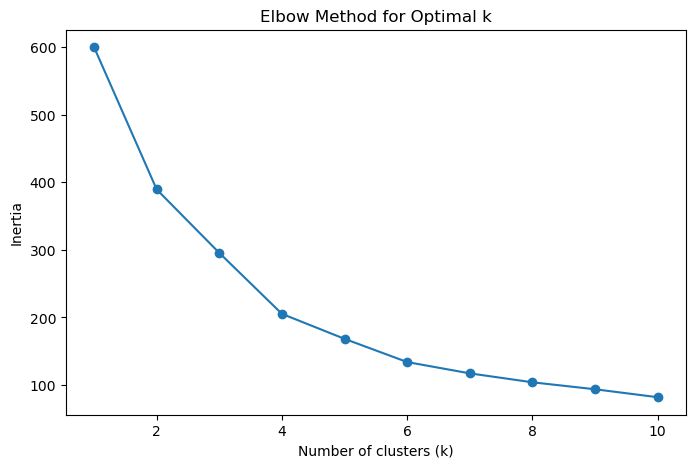

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
# Set the optimal number of clusters
optimal_k = 5

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


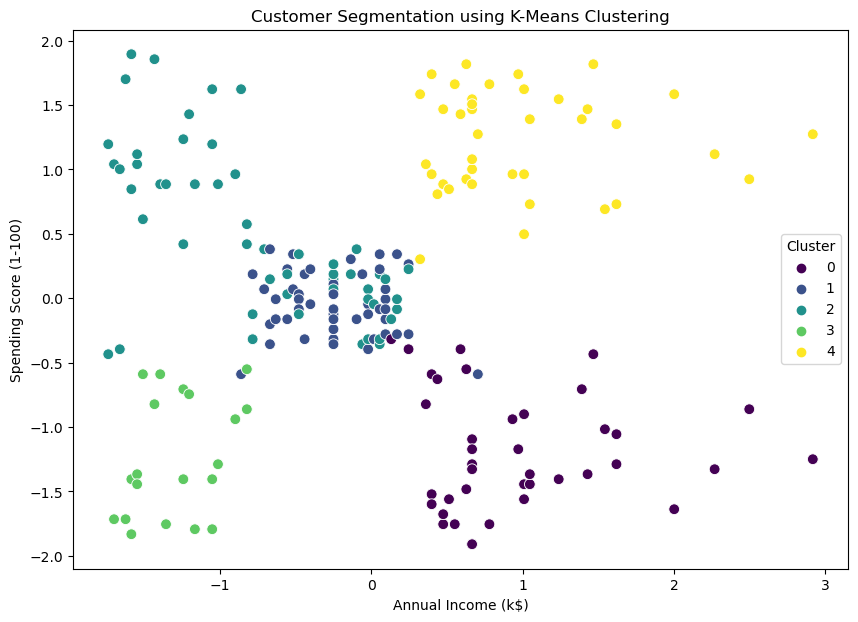

In [7]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['annual_income'], y=data[ 'spending_score'], 
                hue=data['Cluster'], palette='viridis', s=60)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Add the PCA-transformed components to our DataFrame
data['PCA1'] = pca_features[:, 0]
data['PCA2'] = pca_features[:, 1]

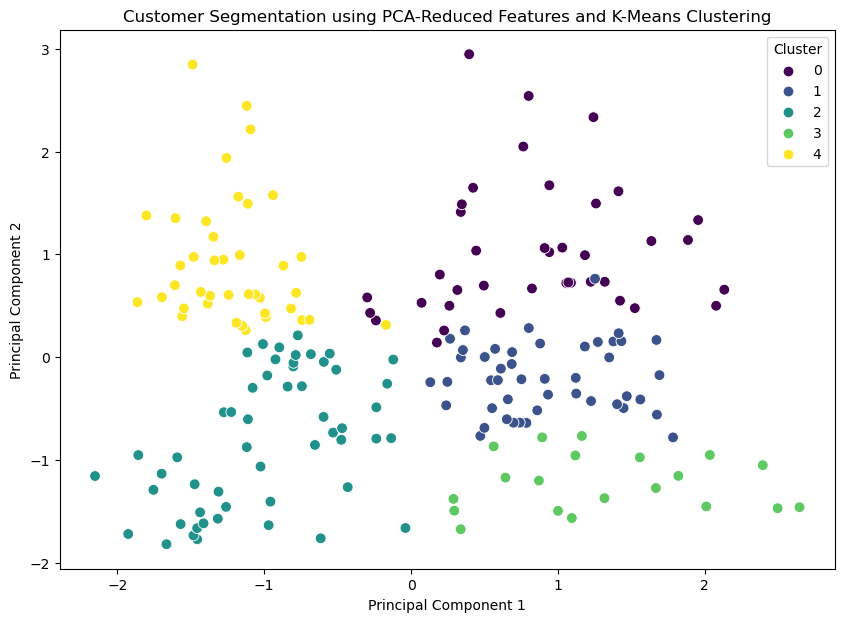

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the clusters in the PCA-reduced 2D space
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue=data['Cluster'], palette='viridis', s=60, data=data)
plt.title('Customer Segmentation using PCA-Reduced Features and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()